# Data Exploration on Real Time Agriculture Production Dataset

### Agriculture Production rate State wise in the respective years Data  Exploration 
link for dataset : https://data.gov.in/catalog/district-wise-season-wise-crop-production-statistics?filters%5Bfield_catalog_reference%5D=87631&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc


In [1]:
#Importing the libraries and Reading the data from the agriculture.csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


#reading the file
agri = pd.read_csv('agriculture.csv')
agri

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [2]:
#Information and description of numerical and object dataset
print("INFORMATION OF THE DATASET: ",end = '\n')
inf = agri.info()
des = agri.describe()
obj_des = agri.describe(include = 'object')

print(inf,end = '\n\n')
print('DESCRIPTION OF THE NUMERICAL DATASET : ',end = '\n')
print(des,end = '\n\n')
print('DESCRIPTION OF OBJECT DATASET: ',end = '\n')
print(obj_des, end = '\n\n')

INFORMATION OF THE DATASET: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       246091 non-null object
District_Name    246091 non-null object
Crop_Year        246091 non-null int64
Season           246091 non-null object
Crop             246091 non-null object
Area             246091 non-null float64
Production       242361 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None

DESCRIPTION OF THE NUMERICAL DATASET : 
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09

DESCRIPTION OF OBJECT DATASET

# Observations
1. Missing values are observed only in Production Column which means the data might not available on that particular crop. 
2. Crop_Year, Area, Production are the numerical Datasets where as rest of them are object type of Datasets
3. There are unique 33 states, 646 districts, 6 seasons and 124 crops.
4. Frequency rate of respective columns
    a. In State wise Uttar pradesh has the highest frequency of 33306.
    b. In district wise BIJAPUR has the highest freuency of 945.
    c. kharif season has the frequency of 95951 and 
    d. rice has the frequency of 15104.

    


## Here Crops and their total production from 1997 to 2015 (19years) is caluculated

In [3]:
#dropping the missing values.
agri= agri.dropna()
agri.info()


#Getting the list of unique Crops
crops = agri['Crop'].unique()

for i in range(len(crops)):
    print(i+1, crops[i], end ='\n')
    
 
#Crops and its Production is calculated.
cr_p = {}
for i in crops:
    cr_p[i] = sum(agri[agri['Crop'] == i].Production)
    
#Crops the Production printing   
for crop, prod in cr_p.items():
    print(crop, prod, end = '\n')

#Calculating the  total Production Rate  and comparing them  
p_a = (sum(cr_p.values()))
p_b = round(sum(agri.Production), 2)

#checking wether the Individual calculated production matches with the total production 
print('Crop wise calculated production matches with the total production(True or False): ', p_a == p_b)

#Converting the Dictionary to DataFrame and the saving the information into the file as "Crop_wise_production.csv"
cr_p = pd.DataFrame(pd.Series(cr_p), columns = ['Production'])
cr_p = cr_p.sort_values(['Production'], ascending = False)
cr_p.to_csv('Crop_Wise_production.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       242361 non-null object
District_Name    242361 non-null object
Crop_Year        242361 non-null int64
Season           242361 non-null object
Crop             242361 non-null object
Area             242361 non-null float64
Production       242361 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB
1 Arecanut
2 Other Kharif pulses
3 Rice
4 Banana
5 Cashewnut
6 Coconut 
7 Dry ginger
8 Sugarcane
9 Sweet potato
10 Tapioca
11 Black pepper
12 Dry chillies
13 other oilseeds
14 Turmeric
15 Maize
16 Moong(Green Gram)
17 Urad
18 Arhar/Tur
19 Groundnut
20 Sunflower
21 Bajra
22 Castor seed
23 Cotton(lint)
24 Horse-gram
25 Jowar
26 Korra
27 Ragi
28 Tobacco
29 Gram
30 Wheat
31 Masoor
32 Sesamum
33 Linseed
34 Safflower
35 Onion
36 other misc. pulses
37 Samai
38 Small millets
39 Coriander
40 Potato
41 Other  Rabi pulses
42 Soyabean
43 Beans & Mutter

# Observations:
1. Coconut is the most produced crop over the 19 years with the production rate of 129981629216.29001
2. Sugracane(5535681525.919997), Rice(1605470383.37), Wheat(1332825656.8000002) are in 2nd, 3rd, 4th positons respectively.
3. Bitter Gourd is the least grown crop over these 19 years with the production of 353.0 within the gien Data


### Here the Crop and Year in which that particular crop is grown is stored in the DataFrame and the information is saved as csv file

In [4]:
#Here the the Crop and the respective years of production are stored in the DataFrame
#Cy -- crop year.

cy = {}
for i in crops:
    cy[i] = list((agri[agri['Crop'] == i].Crop_Year).unique())

#Converting the dictionary into DataFrame
cy = pd.DataFrame(list(cy.values()), index=cy.keys())
cy = pd.DataFrame.transpose(cy)

#Saving the Years in which crops are grown into a CSV file 
cy.to_csv('crop_year.csv')
cy

,Arecanut,Other Kharif pulses,Rice,Banana,Cashewnut,Coconut,Dry ginger,Sugarcane,Sweet potato,Tapioca,...,Yam,Pump Kin,Apple,Peach,Pear,Plums,Litchi,Ber,Other Dry Fruit,Jute & mesta
0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2002.0,2003.0,2002.0,2002.0,2002.0,2002.0,2003.0,2002.0,2003.0,1999.0
1,2001.0,2001.0,2001.0,2002.0,2001.0,2001.0,2001.0,2001.0,2001.0,2006.0,...,2003.0,2002.0,2003.0,2003.0,2003.0,2003.0,2002.0,2003.0,NaN,2000.0
2,2002.0,1997.0,2002.0,2003.0,2002.0,2002.0,2002.0,2002.0,2006.0,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0
3,2003.0,1998.0,2003.0,2004.0,2003.0,2003.0,2003.0,2006.0,2010.0,2005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.0
4,2004.0,2002.0,2004.0,2005.0,2004.0,2004.0,2004.0,2010.0,2005.0,2008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0
5,2006.0,2003.0,2005.0,2006.0,2005.0,2005.0,2006.0,2003.0,2002.0,2009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010.0,2004.0,2010.0,2010.0,2006.0,2006.0,2010.0,2004.0,2003.0,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005.0,2005.0,2006.0,2001.0,2010.0,2010.0,2005.0,2005.0,2004.0,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008.0,2006.0,1997.0,2008.0,2013.0,2008.0,2008.0,1997.0,2009.0,2002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009.0,2008.0,1998.0,2009.0,2014.0,2009.0,2012.0,1998.0,2011.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# State wise production rate is calculated

1 Andaman and Nicobar Islands
2 Andhra Pradesh
3 Arunachal Pradesh
4 Assam
5 Bihar
6 Chandigarh
7 Chhattisgarh
8 Dadra and Nagar Haveli
9 Goa
10 Gujarat
11 Haryana
12 Himachal Pradesh
13 Jammu and Kashmir 
14 Jharkhand
15 Karnataka
16 Kerala
17 Madhya Pradesh
18 Maharashtra
19 Manipur
20 Meghalaya
21 Mizoram
22 Nagaland
23 Odisha
24 Puducherry
25 Punjab
26 Rajasthan
27 Sikkim
28 Tamil Nadu
29 Telangana 
30 Tripura
31 Uttar Pradesh
32 Uttarakhand
33 West Bengal
State-wise calculated production matches with the total production(True or False):  True
                               Production
Kerala                       9.788005e+10
Andhra Pradesh               1.732459e+10
Tamil Nadu                   1.207644e+10
Uttar Pradesh                3.234493e+09
Assam                        2.111752e+09
West Bengal                  1.397904e+09
Maharashtra                  1.263641e+09
Karnataka                    8.634298e+08
Andaman and Nicobar Islands  7.182232e+08
Punjab                    

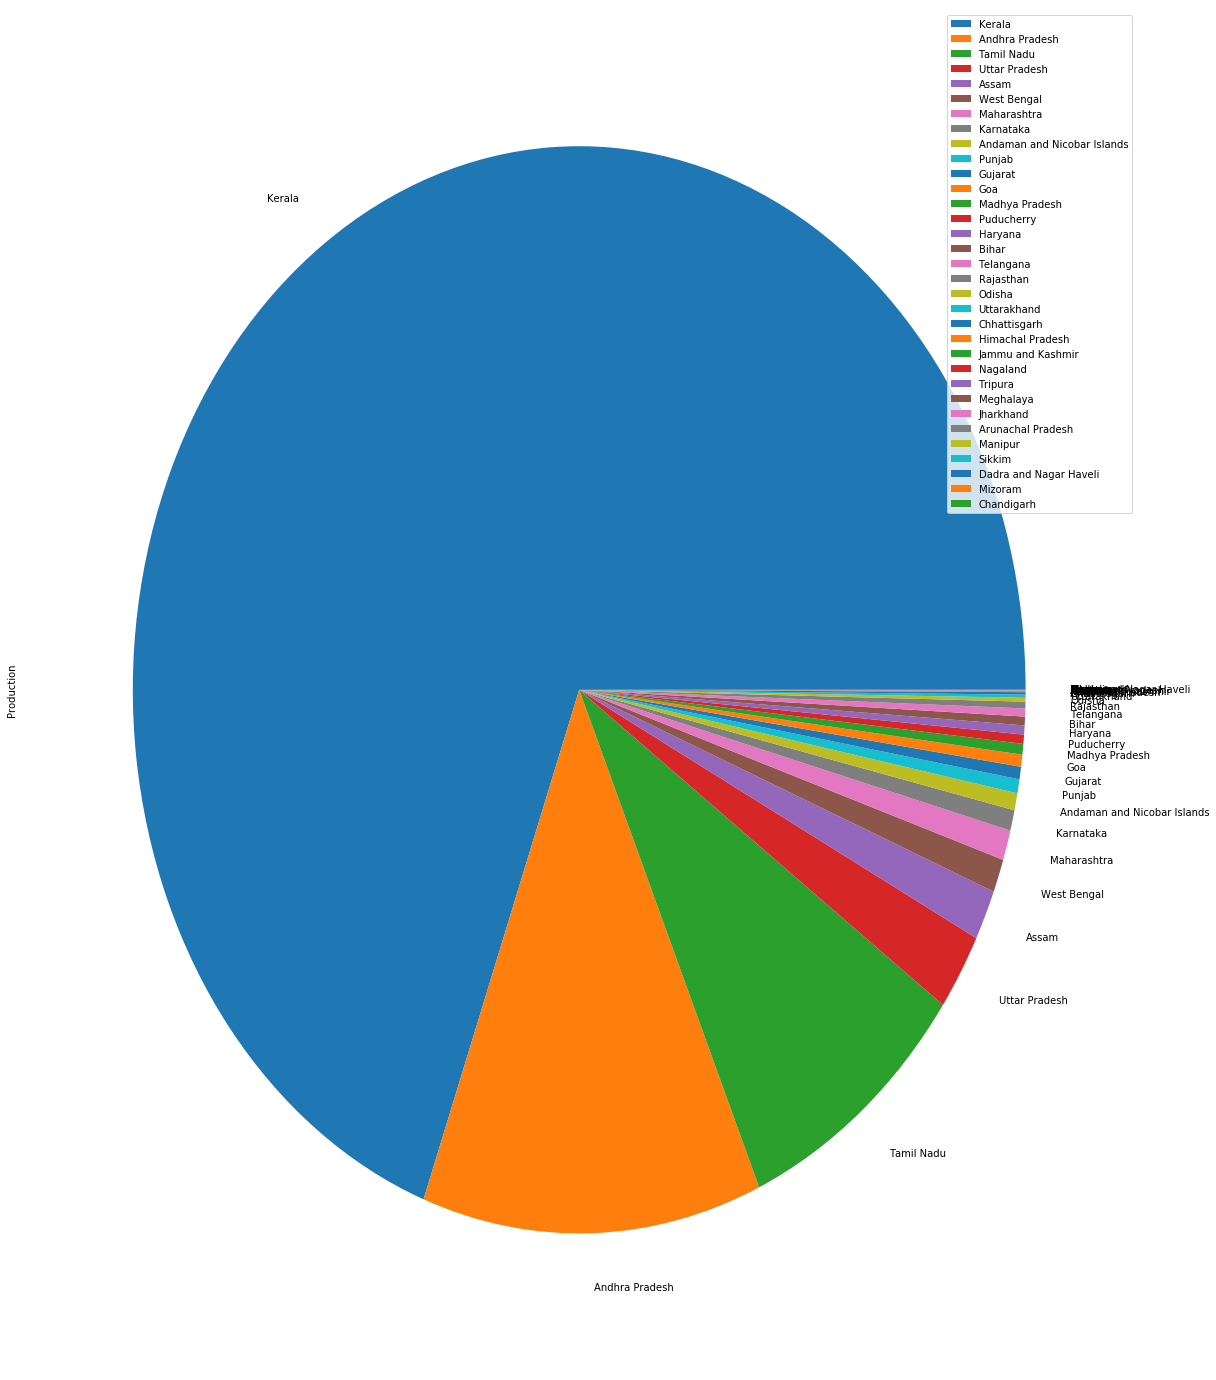

In [5]:
#printing Unique states 
states = agri['State_Name'].unique()
for i in range(len(states)):
    print(i+1, states[i], end = '\n')

S_p = {}
s = []
total = 0

#Calculating the Production State-wise
for i in states:
    s = list(agri[agri['State_Name'] == i].Production)
    s = [incom for incom in s if str(incom) != 'nan']
    S_p[i] = sum(s)


#Checking wether the Individual calculated production matches with the total production 
p_c = round(sum(S_p.values()), 2)
print('State-wise calculated production matches with the total production(True or False): ', p_c == p_b)




S_p =pd.DataFrame(pd.Series(S_p), columns = ['Production'])
S_p = S_p.sort_values(['Production'], ascending = False)

#Printing the State and Production Rate  all over the years.
print(S_p)

#Plotting the Data in a pie chart.
S_p.plot.pie(y = 'Production',figsize=(20,25))
plt.show()
S_p.to_csv('State_wise_Production.csv')

# Observations:
1. Kerala is the state with the highest production rate 97880045375.70007.
2. Andrapradesh(17324590296.0), Tamilnadu(12076443048.929998), Uttar Pradesh(3234492662.6999965) are in 2nd, 3rd, 4th positions respectively.


# The frequnecy of the crops is Plotted.

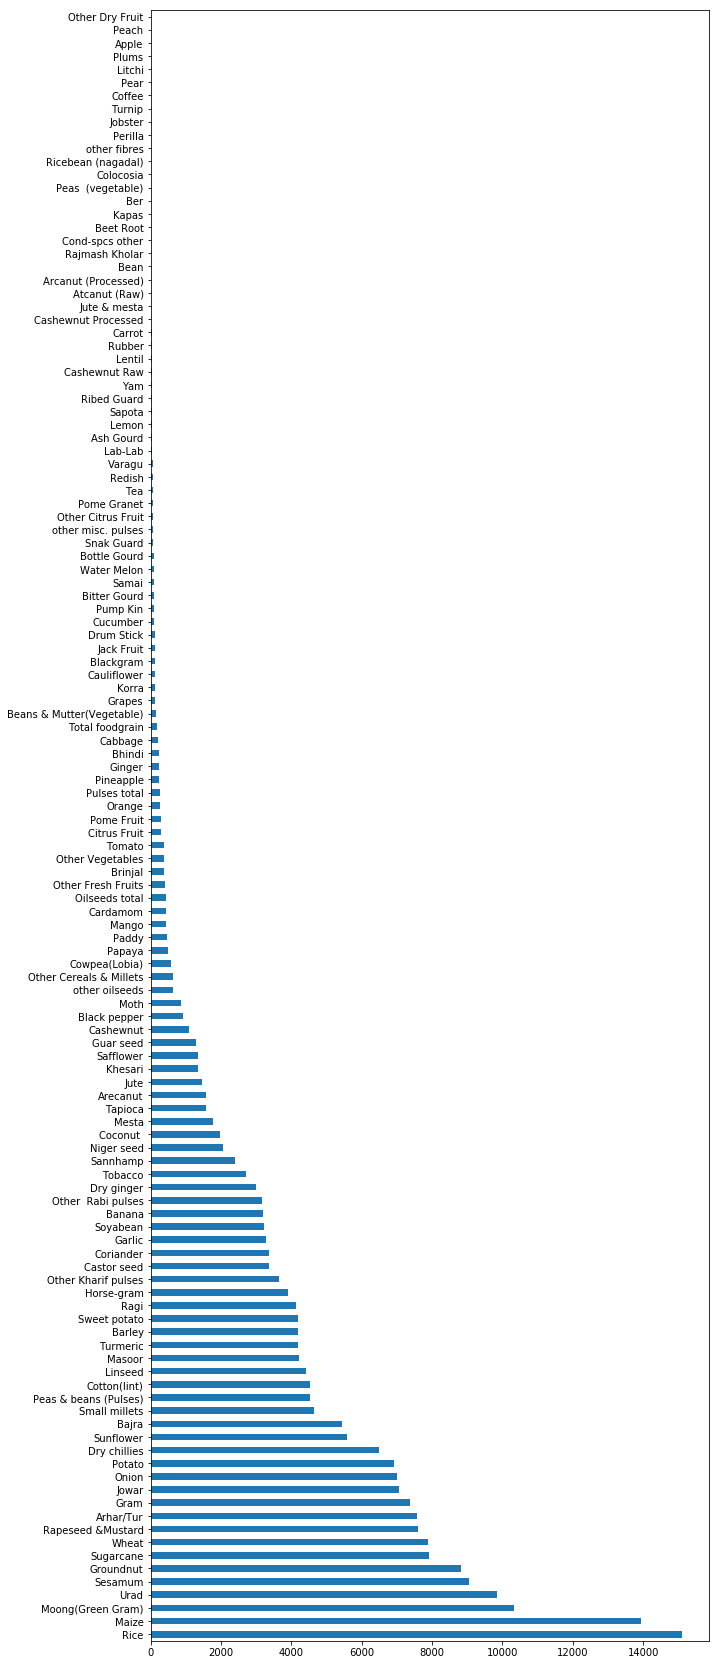

In [6]:
agri  = pd.read_csv('agriculture.csv')
 
#Plotting the crop and and frequency of the crop (How many times it has grown over those 19 years)
df = agri['Crop'].value_counts().plot(kind = 'barh', figsize= (10,30))


# Observations:
1. Rice is the most frequently grown crops over those 19 years with the frequency above 14000.
2. Maize has a frquency of near 14000.
